# Load and Inspect the Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = pd.read_csv('train.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Visualize Missing Values

Missing Values (%):
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


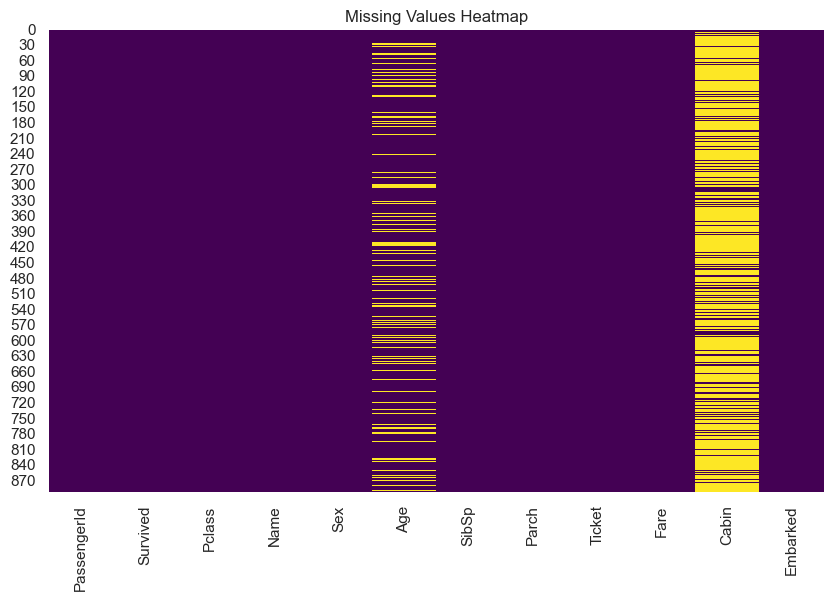

In [11]:
# Missing values percentage
print("Missing Values (%):")
print(df.isnull().sum() / len(df) * 100)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Analyze Target Variable (Survived)

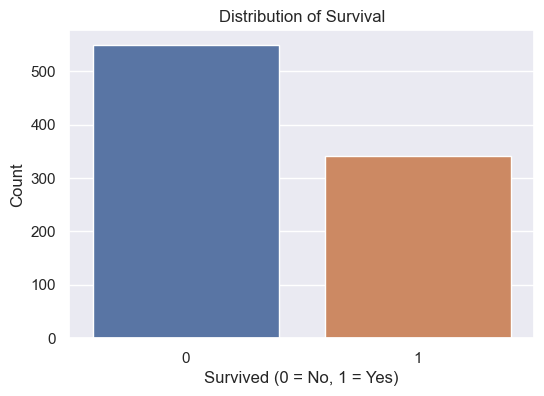

Survival Rate (%):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [15]:
# Countplot of Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival rate percentage
print("Survival Rate (%):")
print(df['Survived'].value_counts(normalize=True) * 100)

# Analyze Numerical Features

C:\Users\Riyaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riyaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riyaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Riyaz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

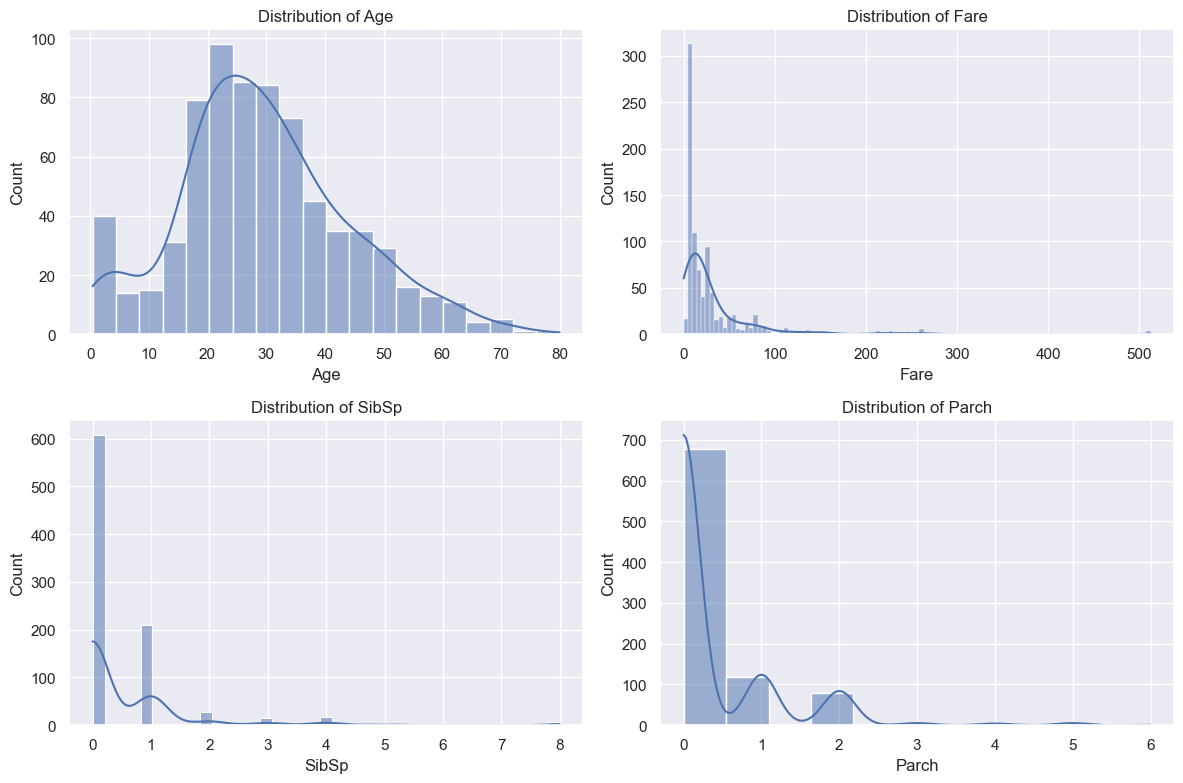

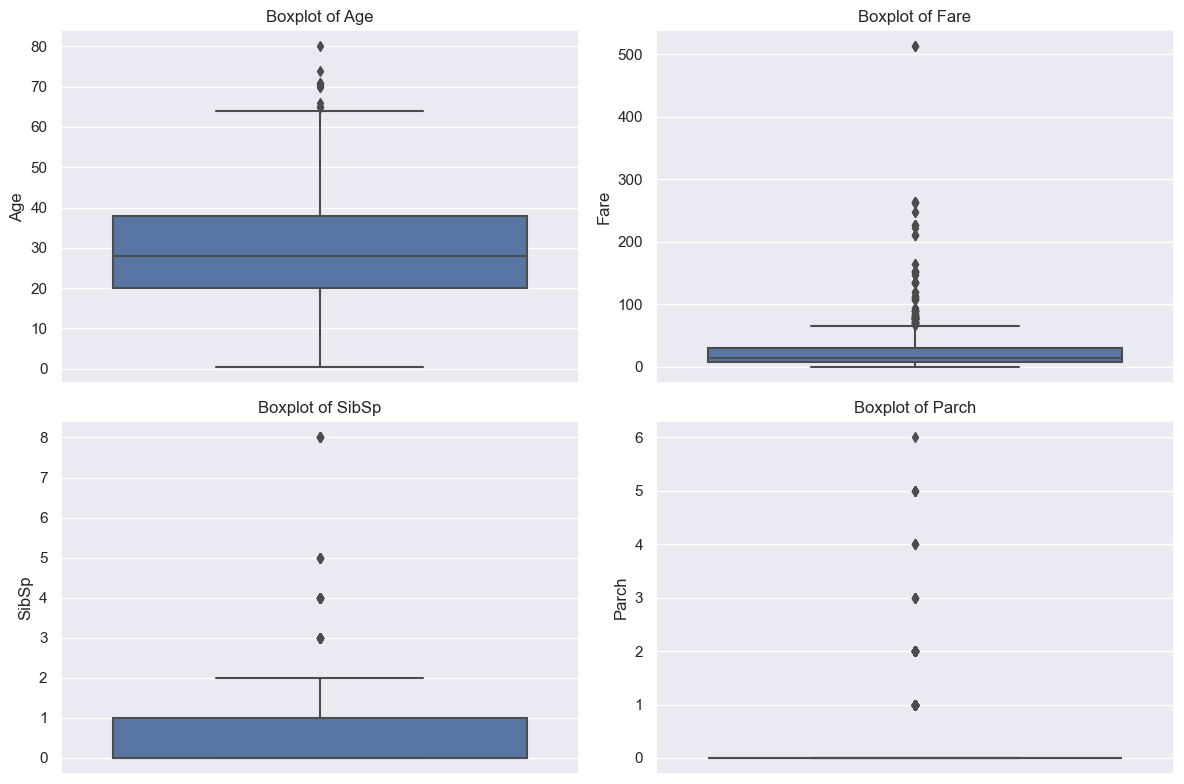

In [16]:
# Numerical columns
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Analyze Categorical Features

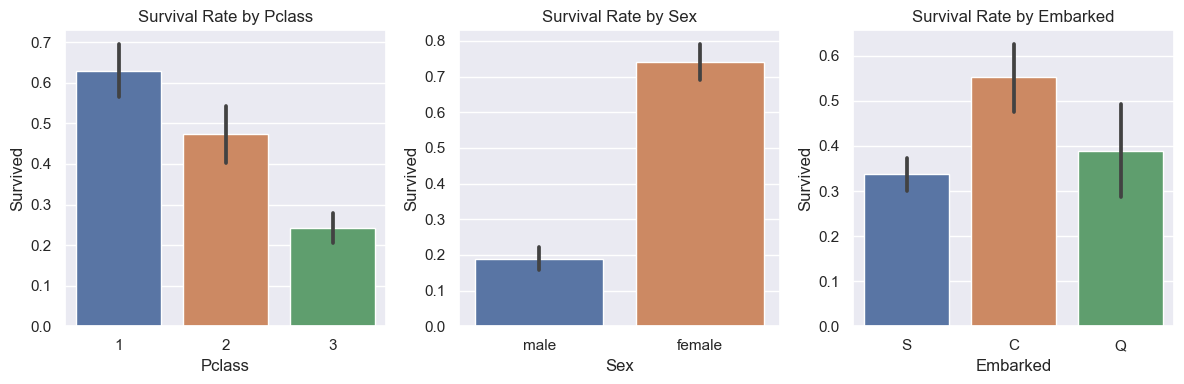


Value Counts for Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Value Counts for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [18]:
# Categorical columns
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Barplots vs. Survived
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=col, y='Survived', data=df)
    plt.title(f'Survival Rate by {col}')
plt.tight_layout()
plt.show()

# Value counts
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

# Correlation Analysis

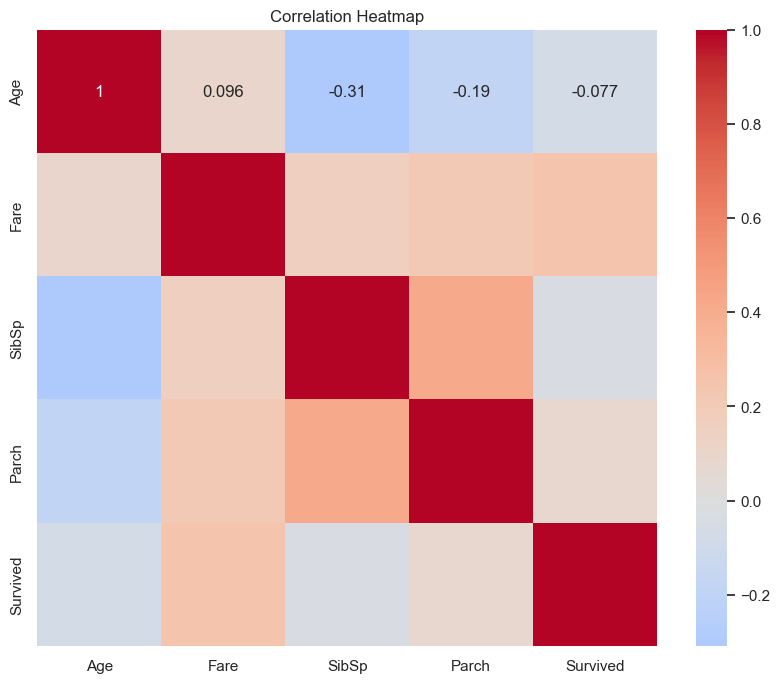

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols + ['Survived']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Feature Interactions

In [20]:
# Survival rate by Sex and Pclass
print("Survival Rate by Sex and Pclass (%):")
print(pd.crosstab([df['Sex'], df['Pclass']], df['Survived'], normalize='index') * 100)

Survival Rate by Sex and Pclass (%):
Survived               0          1
Sex    Pclass                      
female 1        3.191489  96.808511
       2        7.894737  92.105263
       3       50.000000  50.000000
male   1       63.114754  36.885246
       2       84.259259  15.740741
       3       86.455331  13.544669
